#Baca Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from datetime import date
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
df = pd.read_excel('https://github.com/Adkurrr/Predicting-Customer-Lifetime-Value/blob/main/Dataset/OnlineRetail.xlsx?raw=true')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#Praproses

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
#menghapus missing value
df.isnull().sum()
df = df.dropna()
df.shape

#menghapus duplikat data
df = df.drop_duplicates()
df.shape

(401604, 8)

In [ ]:
#mengganti tipe data customerID ke string
df['CustomerID'] = df['CustomerID'].astype(str)

#mengubah tipe data invoiceData
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


#Customer Segmentation

Karena data yang digunakan terlalu besar, maka kami akan menggunakan data dengan country united kingdom saja. UK merupakan data paling banyak dibandingkan dengan negara-negara lainnya

In [ ]:
#mengambil data dengan country = united kingdom
df_uk = df.query("Country=='United Kingdom'").reset_index(drop=True)

In [ ]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


###mencari customer dengan pembelian terbaru (recency)

In [ ]:
# membuat dataframe baru dengan menyimpan CustomerID
new_df = pd.DataFrame(df['CustomerID'].unique())
new_df.columns = ['CustomerID']
new_df.head()

,CustomerID
0,17850.0
1,13047.0
2,12583.0
3,13748.0
4,15100.0


In [ ]:
# mencari pembelian terbesar dari setiap customer
max_purchase = df_uk.groupby('CustomerID')['InvoiceDate'].max().reset_index()

# mengganti nama kolom
max_purchase.columns = ['CustomerID', 'MaxPurchaseDate']

max_purchase.head()

,CustomerID,MaxPurchaseDate
0,12346.0,2011-01-18 10:17:00
1,12747.0,2011-12-07 14:34:00
2,12748.0,2011-12-09 12:20:00
3,12749.0,2011-12-06 09:56:00
4,12820.0,2011-12-06 15:12:00


In [ ]:
# membandingkan transaksi terakhir dengan tanggal pada dataset pada setiap individu
max_purchase['Recency'] = (max_purchase['MaxPurchaseDate'].max() - max_purchase['MaxPurchaseDate']).dt.days
max_purchase.head()

,CustomerID,MaxPurchaseDate,Recency
0,12346.0,2011-01-18 10:17:00,325
1,12747.0,2011-12-07 14:34:00,1
2,12748.0,2011-12-09 12:20:00,0
3,12749.0,2011-12-06 09:56:00,3
4,12820.0,2011-12-06 15:12:00,2


In [ ]:
# menggabungkan kedalam dataset baru
new_df = pd.merge(new_df, max_purchase[['CustomerID','Recency']], on='CustomerID')
new_df.head()

,CustomerID,Recency
0,17850.0,301
1,13047.0,31
2,13748.0,95
3,15100.0,329
4,15291.0,25


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

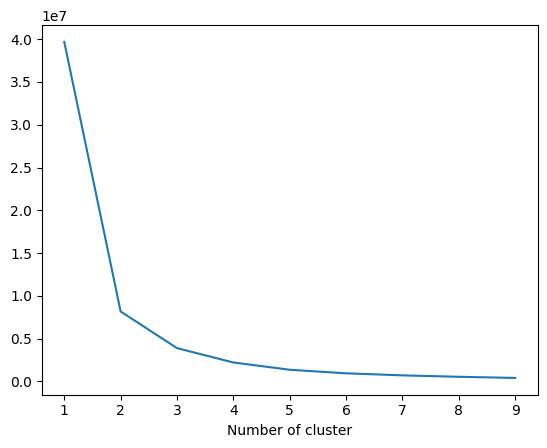

In [ ]:
#mencari jumlah cluster untuk recency
sse={}
tx_recency = new_df[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

###klasifikasi customer berdasarkan pembelian terbaru (RecencyCluster)

In [ ]:
#membuat 2 cluster untuk recency
kmeans = KMeans(n_clusters=2)
new_df['RecencyCluster'] = kmeans.fit_predict(new_df[['Recency']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
new_df.head()

,CustomerID,Recency,RecencyCluster
0,17850.0,301,1
1,13047.0,31,0
2,13748.0,95,0
3,15100.0,329,1
4,15291.0,25,0


#Klasifikasi frequensi pembelian customer

In [ ]:
#mendapatkan jumlah pesanan untuk setiap pengguna dan membuat dataframe dengannya
frequency = df_uk.groupby('CustomerID').InvoiceDate.count().reset_index()
frequency.columns = ['CustomerID','Frequency']

In [ ]:
#menambahkan ke dataset baru
new_df = pd.merge(new_df, frequency, on='CustomerID')

new_df.head()

,CustomerID,Recency,RecencyCluster,Frequency
0,17850.0,301,1,309
1,13047.0,31,0,196
2,13748.0,95,0,28
3,15100.0,329,1,6
4,15291.0,25,0,109


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-17-1d7be91b7e91>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-17-1d7be91b7e91>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

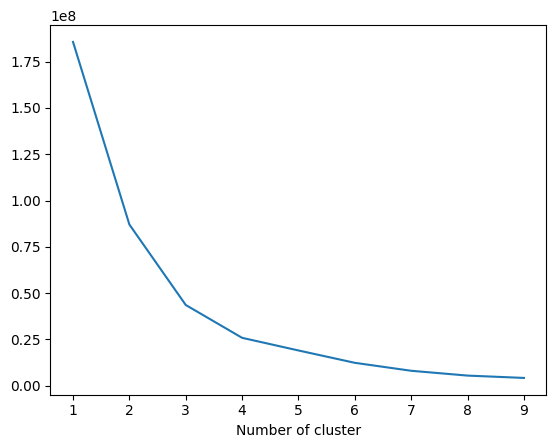

In [ ]:
# mencari jumlah cluster untuk frequensi
sse={}
tx_recency = new_df[['Frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
# menerapkan Kmeans untuk frequensi
kmeans = KMeans(n_clusters=4)
new_df['FrequencyCluster']=kmeans.fit_predict(new_df[['Frequency']])

new_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster
0,17850.0,301,1,309,3
1,13047.0,31,0,196,3
2,13748.0,95,0,28,0
3,15100.0,329,1,6,0
4,15291.0,25,0,109,0


###Klasifikasi pendapatan

pendapatan = unit price * quantity

In [ ]:
#menghitung jumlah pendapatan
df_uk['Monetary'] = df_uk['UnitPrice'] * df_uk['Quantity']
monetary = df_uk.groupby('CustomerID').Monetary.sum().reset_index()
monetary.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12747.0,4196.01
2,12748.0,28405.56
3,12749.0,3868.20
4,12820.0,942.34


In [ ]:
#menggabungkan dengan dataset baru
new_df = pd.merge(new_df, monetary, on='CustomerID')
new_df.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary
0,17850.0,301,1,309,3,5303.48
1,13047.0,31,0,196,3,3079.10
2,13748.0,95,0,28,0,948.25
3,15100.0,329,1,6,0,635.10
4,15291.0,25,0,109,0,4596.51


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-21-7a312560131f>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-21-7a312560131f>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

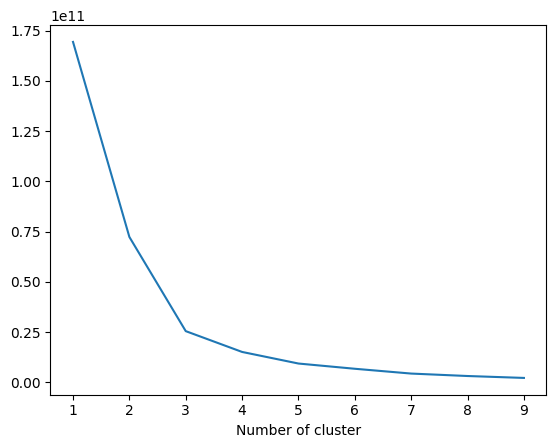

In [ ]:
#mencari nilai n untuk monetary
sse={}
tx_recency = new_df[['Monetary']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
#menerapkan kmeans untuk monetary
kmeans = KMeans(n_clusters=3)
new_df['MonetaryCluster'] = kmeans.fit_predict(new_df[['Monetary']])

#show details of the dataframe
new_df.groupby('MonetaryCluster')['Monetary']
new_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster
0,17850.0,301,1,309,3,5303.48,0
1,13047.0,31,0,196,3,3079.10,0
2,13748.0,95,0,28,0,948.25,0
3,15100.0,329,1,6,0,635.10,0
4,15291.0,25,0,109,0,4596.51,0


#Recency Frequency Monetary (RFM)

In [ ]:
#menghitung nilai keseluruhan rfm score menggunakan rata-ratanya
new_df['OverallScore'] = new_df['RecencyCluster'] + new_df['FrequencyCluster'] + new_df['MonetaryCluster']
new_df.groupby('OverallScore')[['Recency','Frequency','Monetary']].mean()

,Recency,Frequency,Monetary
OverallScore,,,
0,43.249701,57.284349,1122.531570
1,245.884576,27.089888,428.214301
2,7.250000,883.541667,16033.562917
3,18.083130,364.694377,4596.614230
4,105.800000,744.000000,49850.379333
5,8.083333,403.416667,41390.096667


In [ ]:
new_df['Segment'] = 'Low-Value'
new_df.loc[new_df['OverallScore']>2,'Segment'] = 'High-Value'

In [ ]:
new_df.head(10)

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment
0,17850.0,301,1,309,3,5303.48,0,4,High-Value
1,13047.0,31,0,196,3,3079.10,0,3,High-Value
2,13748.0,95,0,28,0,948.25,0,0,Low-Value
3,15100.0,329,1,6,0,635.10,0,1,Low-Value
4,15291.0,25,0,109,0,4596.51,0,0,Low-Value
5,14688.0,7,0,356,3,5055.61,0,3,High-Value
6,17809.0,15,0,64,0,4627.62,0,0,Low-Value
7,15311.0,0,0,2478,2,59284.19,2,4,High-Value
8,14527.0,2,0,1010,2,7709.69,0,2,Low-Value
9,16098.0,87,0,67,0,2005.63,0,0,Low-Value


#Customer Lifetime Value
Lifetime Value: Total Gross Revenue - Total Cost

In [ ]:
#konversi object python date ke pandas timestamp
start_date = pd.Timestamp(date(2011, 3, 1))
end_date = pd.Timestamp(date(2011, 6, 1))

#filter dataframe menggunakan pandas timestamp
df_3month = df_uk[(df_uk.InvoiceDate < end_date) & (df_uk.InvoiceDate >= start_date)].reset_index(drop=True)

In [ ]:
#menghitung monetary 3 bulan dan membuat new dataframe
df_3month['Monetary'] = df_3month['UnitPrice'] * df_3month['Quantity']
new_df_3month = df_3month.groupby('CustomerID')['Monetary'].sum().reset_index()
new_df_3month.columns = ['CustomerID','3MonthMonetary']

In [ ]:
new_df_3month.head()

,CustomerID,3MonthMonetary
0,12747.0,1082.09
1,12748.0,4276.60
2,12749.0,782.10
3,12821.0,92.72
4,12823.0,459.00


In [ ]:
# Plot the histogram
plot_data = [
    go.Histogram(
        x=new_df_3month['3MonthMonetary']
    )
]

plot_layout = go.Layout(
        title='3 Month Monetary'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)

# Display the plot
iplot(fig)

In [ ]:
df_merge = pd.merge(new_df, new_df_3month, on='CustomerID', how='left')
df_merge = df_merge.fillna(0)

In [ ]:
#membuat visualisasi
df_graph = df_merge
plot_data = [
    go.Scatter(
        x=df_graph.query("Segment == 'Low-Value'")['OverallScore'],
        y=df_graph.query("Segment == 'Low-Value'")['3MonthMonetary'],
        mode='markers',
        name='Low',
        marker=dict(
            size=7,
            line=dict(width=1),
            color='blue',
            opacity=0.8
        )
    ),

    go.Scatter(
        x=df_graph.query("Segment == 'High-Value'")['OverallScore'],
        y=df_graph.query("Segment == 'High-Value'")['3MonthMonetary'],
        mode='markers',
        name='High',
        marker=dict(
            size=11,
            line=dict(width=1),
            color='red',
            opacity=0.9
        )
    ),
]

plot_layout = go.Layout(
    yaxis={'title': "3 Month LTV"},
    xaxis={'title': "RFM Score"},
    title='CLV'
)
fig = go.Figure(data=plot_data, layout=plot_layout)
iplot(fig)


In [ ]:
#menghapus outliers
df_merge = df_merge[df_merge['3MonthMonetary']<df_merge['3MonthMonetary'].quantile(0.99)]

###klasifikasi 3 Month Monetary

In [ ]:
#membuat 2 cluster untuk clv
kmeans = KMeans(n_clusters=2)
df_merge['LTVCluster'] = kmeans.fit_predict(df_merge[['3MonthMonetary']])

df_merge.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-33-36819ca989a4>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment,3MonthMonetary,LTVCluster
0,17850.0,301,1,309,3,5303.48,0,4,High-Value,0.00,0
1,13047.0,31,0,196,3,3079.10,0,3,Low-Value,831.10,1
2,13748.0,95,0,28,0,948.25,0,0,Low-Value,376.85,0
3,15100.0,329,1,6,0,635.10,0,1,Low-Value,0.00,0
4,15291.0,25,0,109,0,4596.51,0,0,Low-Value,1286.55,1


In [ ]:
#membuat dataframe baru yang mencakup LTVCluster dan 3MonthMonetary
df_cluster = df_merge.copy()
df_cluster.groupby('LTVCluster')['3MonthMonetary'].describe()

,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,3494.0,122.513248,192.686256,-1462.50,0.0000,0.0,225.3375,750.99
1,416.0,1386.617142,599.592012,758.35,921.1875,1207.3,1662.2175,3490.33


#Convert segment data type

In [ ]:
#konversi kolom dengan atribut kategorikal yaitu atribut segment
df_class = pd.get_dummies(df_cluster)
df_class.head()

,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,3MonthMonetary,LTVCluster,CustomerID_12346.0,...,CustomerID_18276.0,CustomerID_18277.0,CustomerID_18278.0,CustomerID_18280.0,CustomerID_18281.0,CustomerID_18282.0,CustomerID_18283.0,CustomerID_18287.0,Segment_High-Value,Segment_Low-Value
0,301,1,309,3,5303.48,0,4,0.00,0,False,...,False,False,False,False,False,False,False,False,True,False
1,31,0,196,3,3079.10,0,3,831.10,1,False,...,False,False,False,False,False,False,False,False,False,True
2,95,0,28,0,948.25,0,0,376.85,0,False,...,False,False,False,False,False,False,False,False,False,True
3,329,1,6,0,635.10,0,1,0.00,0,False,...,False,False,False,False,False,False,False,False,False,True
4,25,0,109,0,4596.51,0,0,1286.55,1,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
#membuat x dan y untuk feature
X = df_class[['Recency','RecencyCluster','Frequency','FrequencyCluster','Monetary','MonetaryCluster','OverallScore']]
y = df_class['3MonthMonetary']

#split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=56)

#Predicting CLV

In [ ]:
# Train the Linear Regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Make predictions
y_pred = regression_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 295890.4145457418
R-squared: -0.06925656774700584


In [ ]:
#melakukan prediksi dan menampilkan hasilnya
predicted_ltv = regression_model.predict(X)
print("Prediksi CLV 3 bulan kedepan :")
print(predicted_ltv)

Prediksi CLV 3 bulan kedepan :
[1067.43442337  562.16377417  144.56035823 ...   56.88391867   50.92581638
   36.14939314]


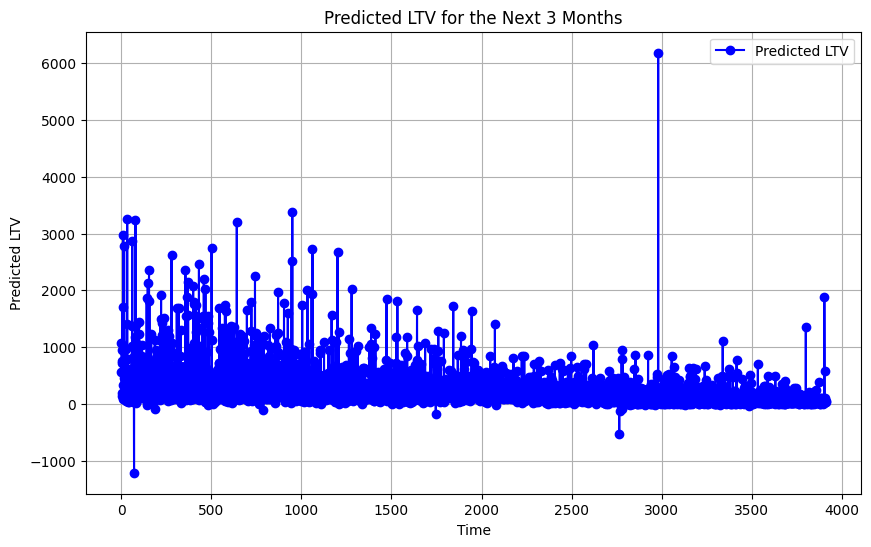

In [ ]:
#membuat visualisasi hasil prediksi
index_3_months = range(1, len(predicted_ltv) + 1)

plt.figure(figsize=(10, 6))
plt.plot(index_3_months, predicted_ltv, marker='o', color='blue', label='Predicted LTV')
plt.xlabel('Time')
plt.ylabel('Predicted LTV')
plt.title('Predicted LTV for the Next 3 Months')
plt.legend()
plt.grid(True)
plt.show()

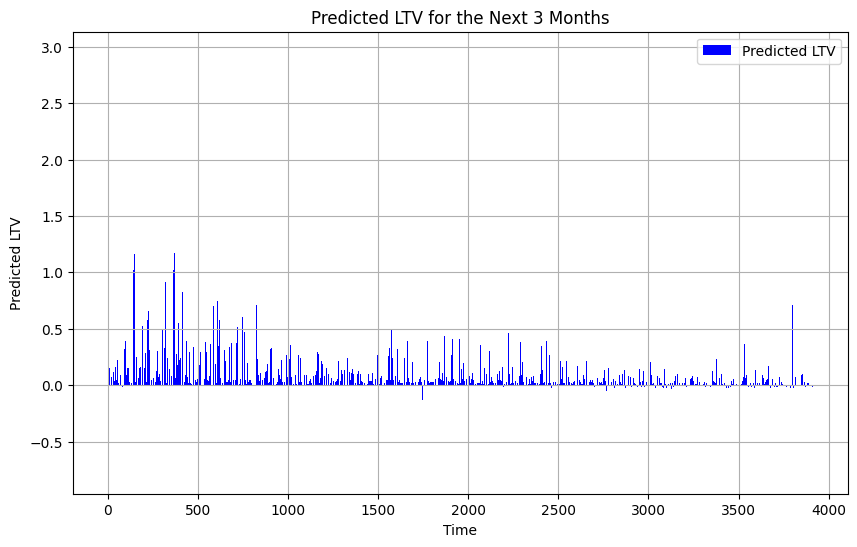

In [ ]:

# Indeks untuk 3 bulan
index_3_months = range(1, len(predicted_ltv) + 1)

# Membuat figure dengan ukuran tertentu
plt.figure(figsize=(10, 6))

# Membuat diagram batang
plt.bar(index_3_months, predicted_ltv, color='blue', label='Predicted LTV')

# Menambahkan label dan judul
plt.xlabel('Time')
plt.ylabel('Predicted LTV')
plt.title('Predicted LTV for the Next 3 Months')

# Menambahkan legenda
plt.legend()

# Menambahkan grid
plt.grid(True)

# Menampilkan plot
plt.show()